In [1]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 2.5 MB/s 


In [2]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
import numpy as np

In [3]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [4]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
link = 'https://drive.google.com/file/d/1VbDD_LxLEuB1oVzPWjA8L_fc9_hTBkR_/view?usp=sharing'
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('employees.csv') 
empleados = pd.read_csv('employees.csv')

In [6]:
empleados.head(25)

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
8,Angela,Female,11/22/2005,6:29 AM,95570,18.523,True,Engineering
9,Frances,Female,8/8/2002,6:51 AM,139852,7.524,True,Business Development


In [7]:
empleados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [8]:
empleados.isnull().sum()

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [9]:
empleados["First Name"].fillna("No Tiene", inplace=True)

Cambiamos los nulos de la columna primer nombre por "No Tiene" con el fin de depurar todos los null.

In [10]:
empleados.isnull().sum()

First Name             0
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [11]:
empleados["Gender"].fillna("No Tiene Genero", inplace=True)

Cambiamos los nulos de la columna Genero por "No Tiene Genero" con el fin de depurar todos los null.

In [12]:
empleados.isnull().sum()

First Name            0
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [13]:
mode =empleados['Senior Management'].mode().values[0]
empleados['Senior Management']= empleados['Senior Management'].replace(np.nan, mode)

Cambiamos los nulos de la columna Senior Management por la moda de esta columna con el fin de depurar todos los null.

In [14]:
empleados.isnull().sum()

First Name            0
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [15]:
mode =empleados['Team'].mode().values[0]
empleados['Team']= empleados['Team'].replace(np.nan, mode)

Cambiamos los nulos de la columna Team por la moda de esta columna con el fin de depurar todos los null.

In [16]:
empleados.isnull().sum()

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

In [17]:
import sweetviz as sv
analyze_report= sv.analyze(empleados)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |          | [  0%]   00:00 -> (? left)

Report analyze.html was generated.



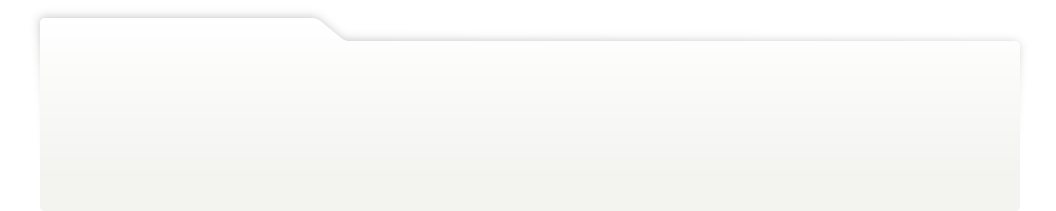
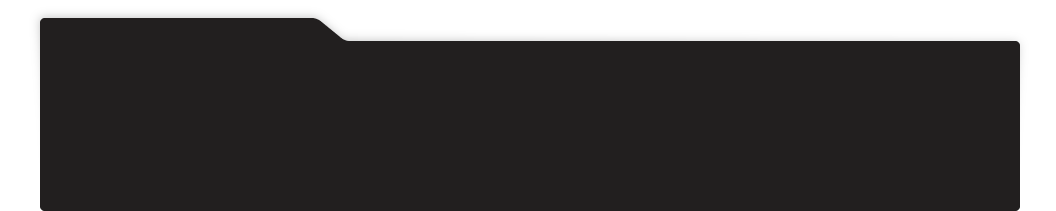
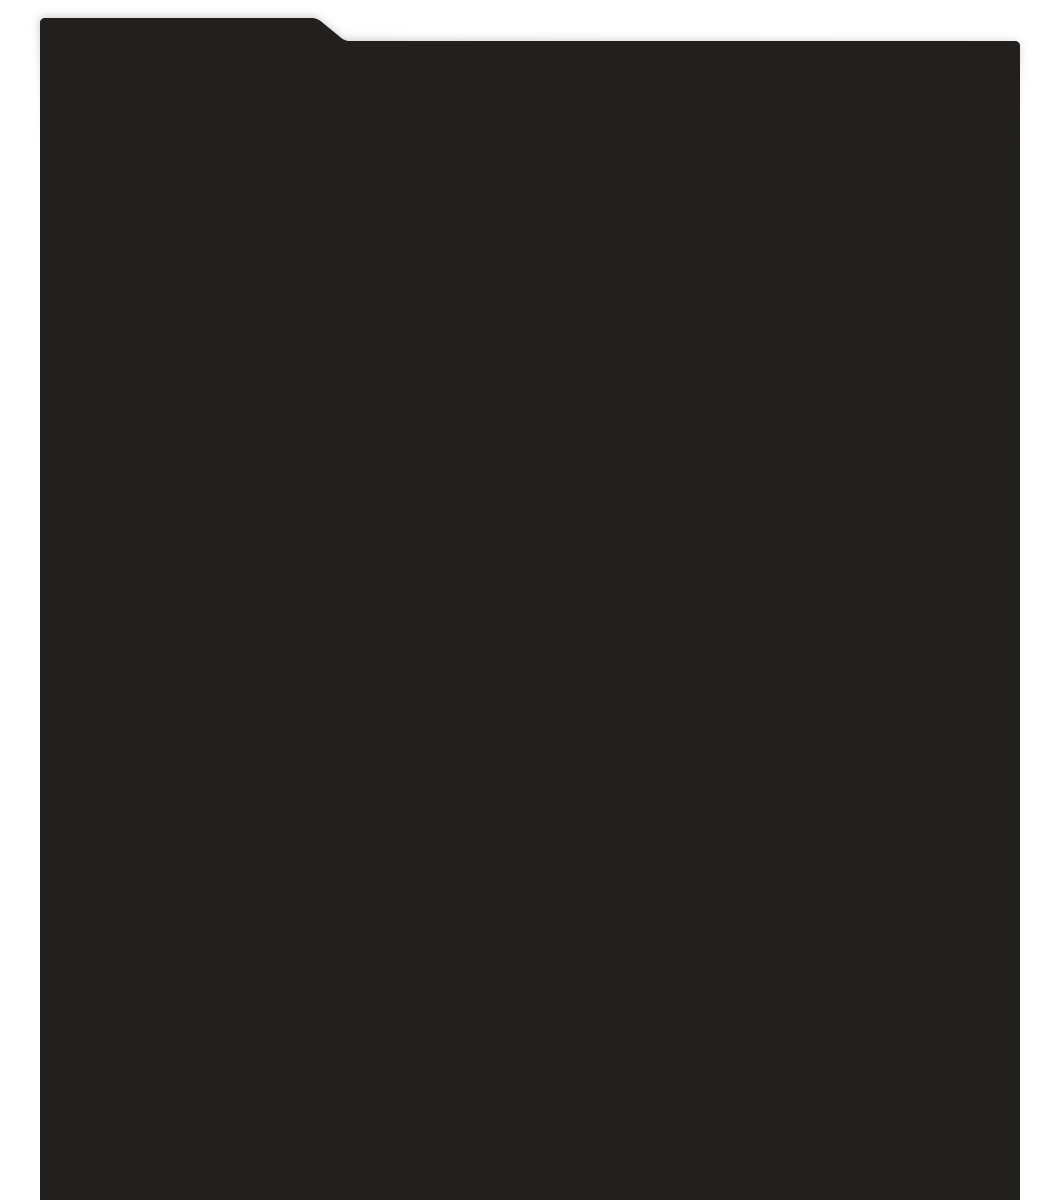
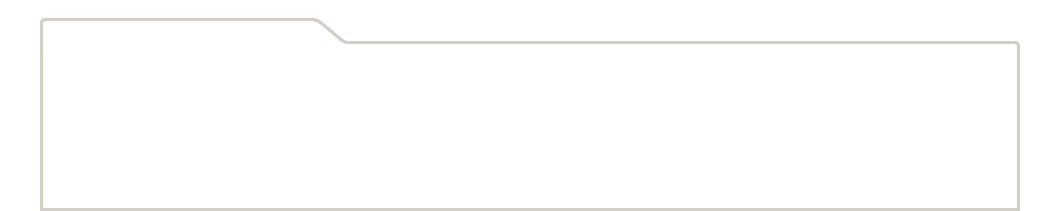
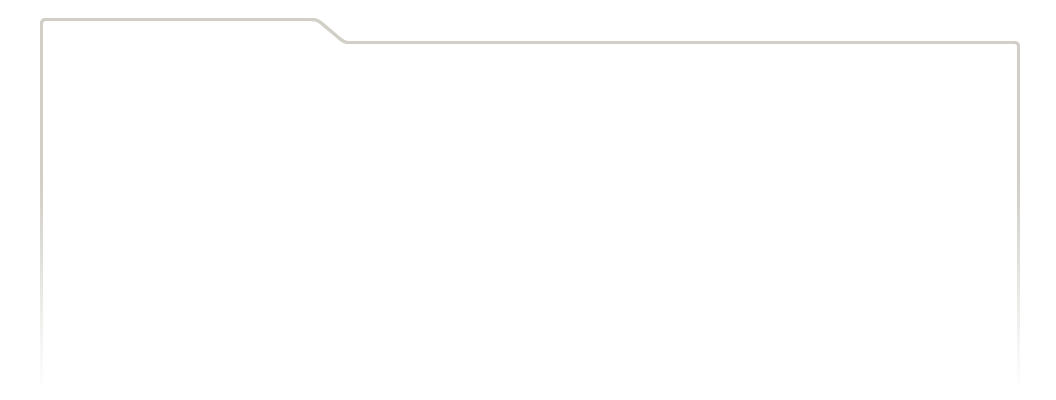
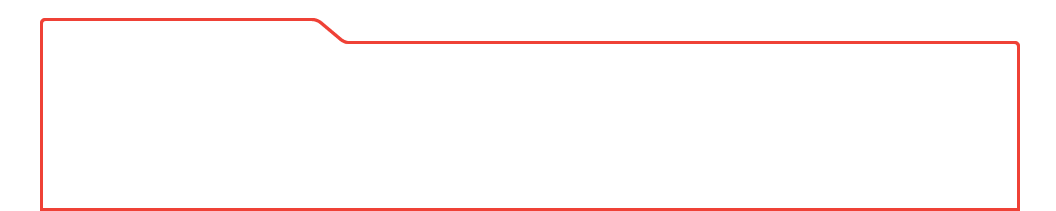
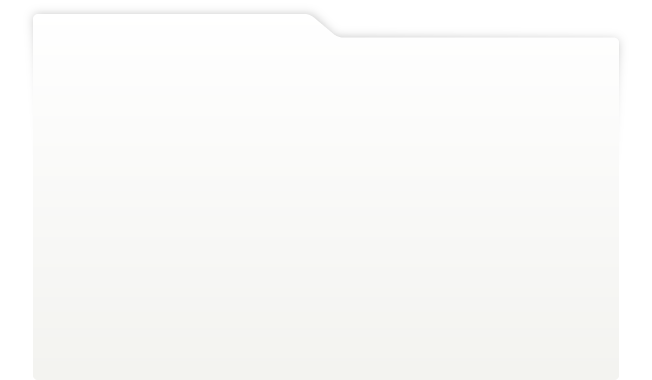
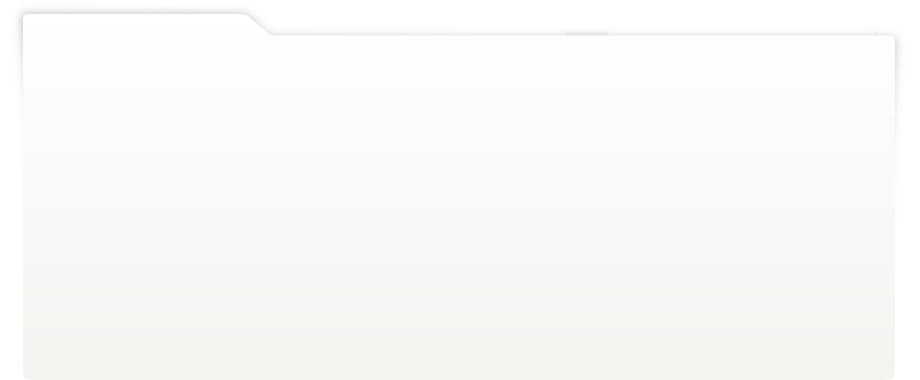
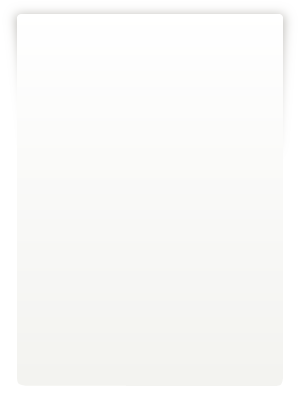
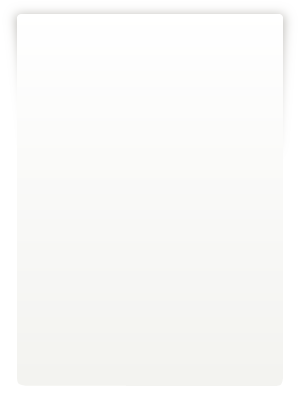
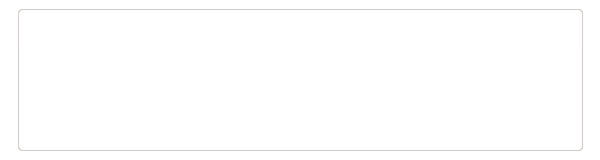
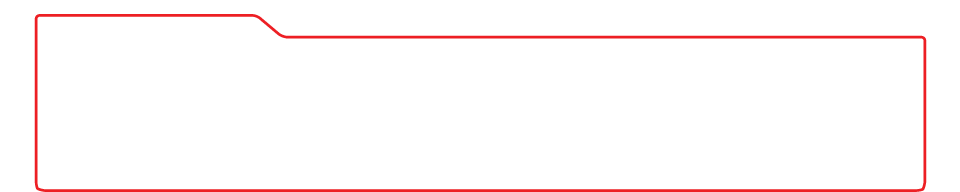
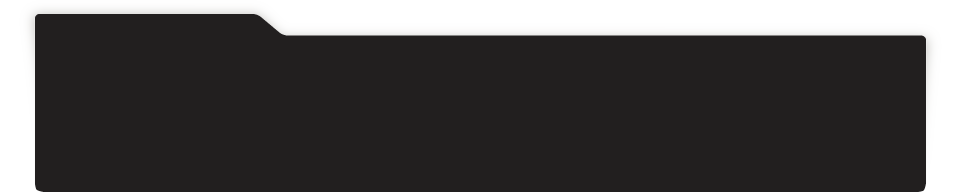
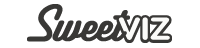
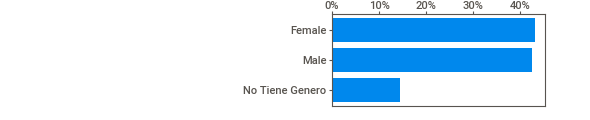
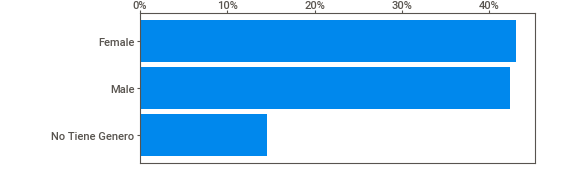
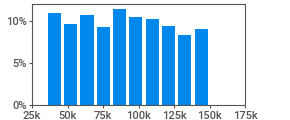
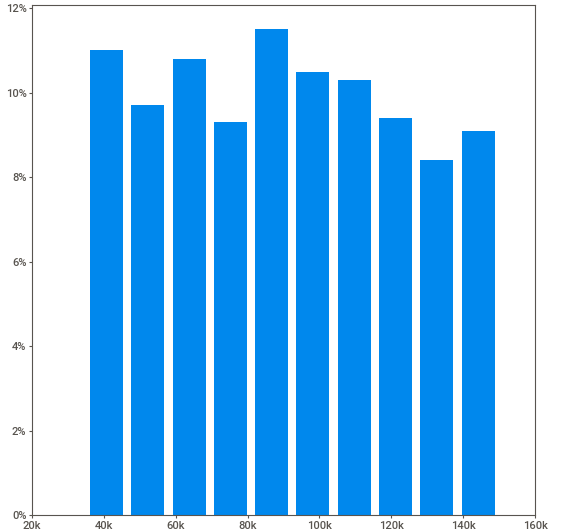
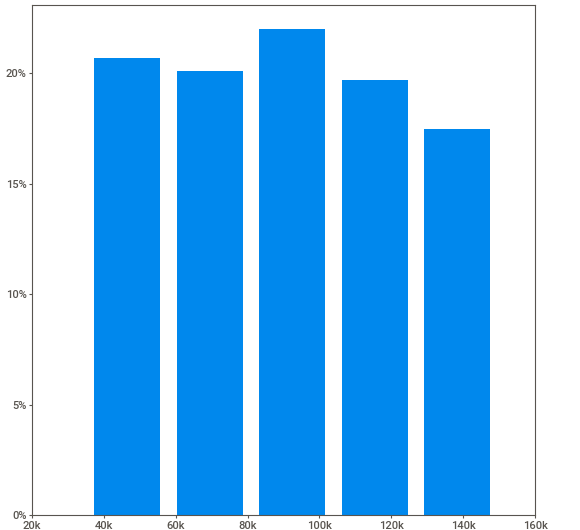
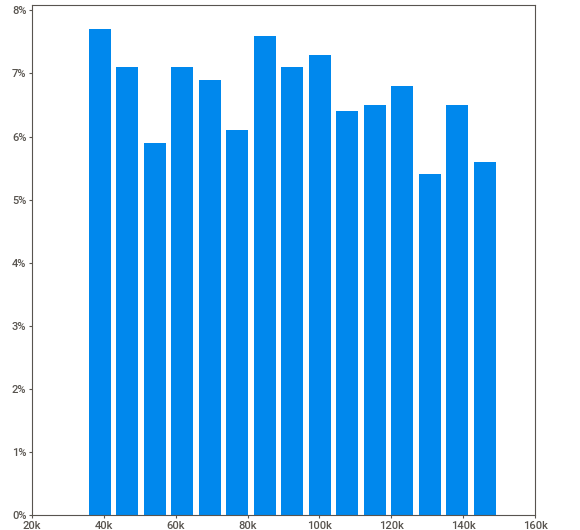
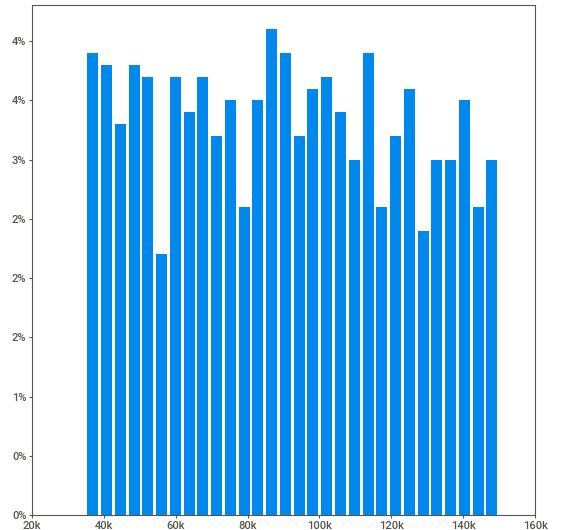
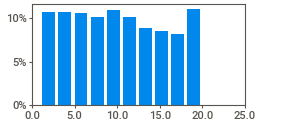
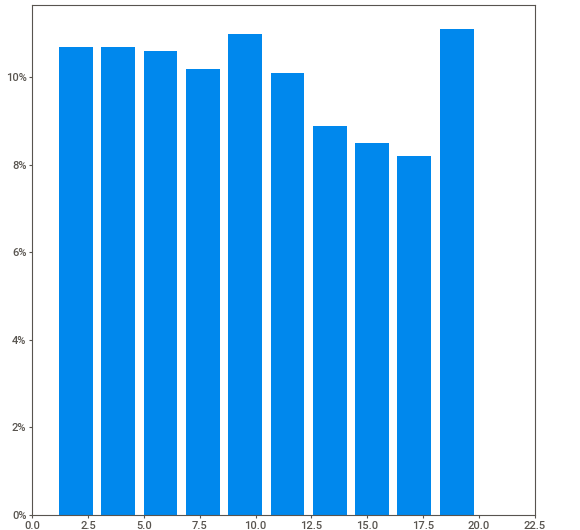
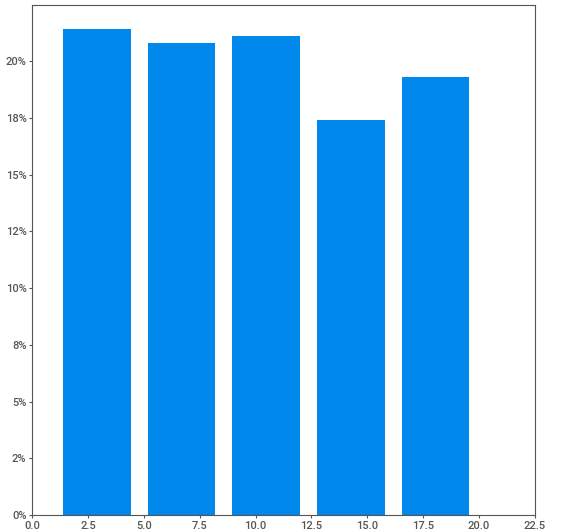
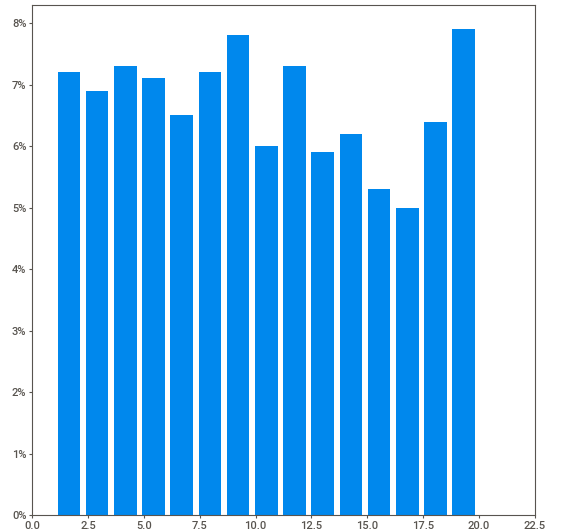
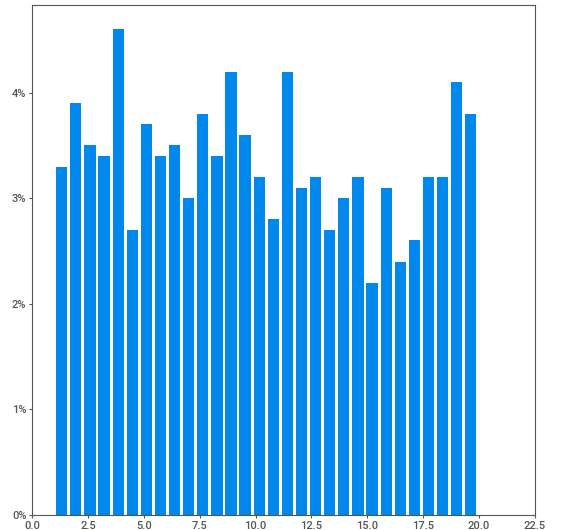
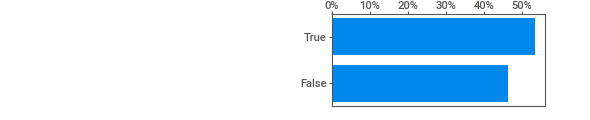
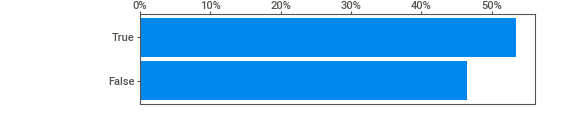
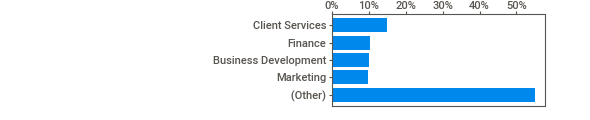
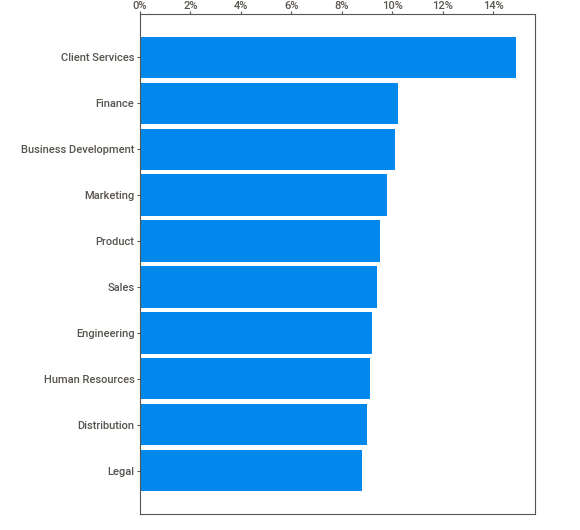
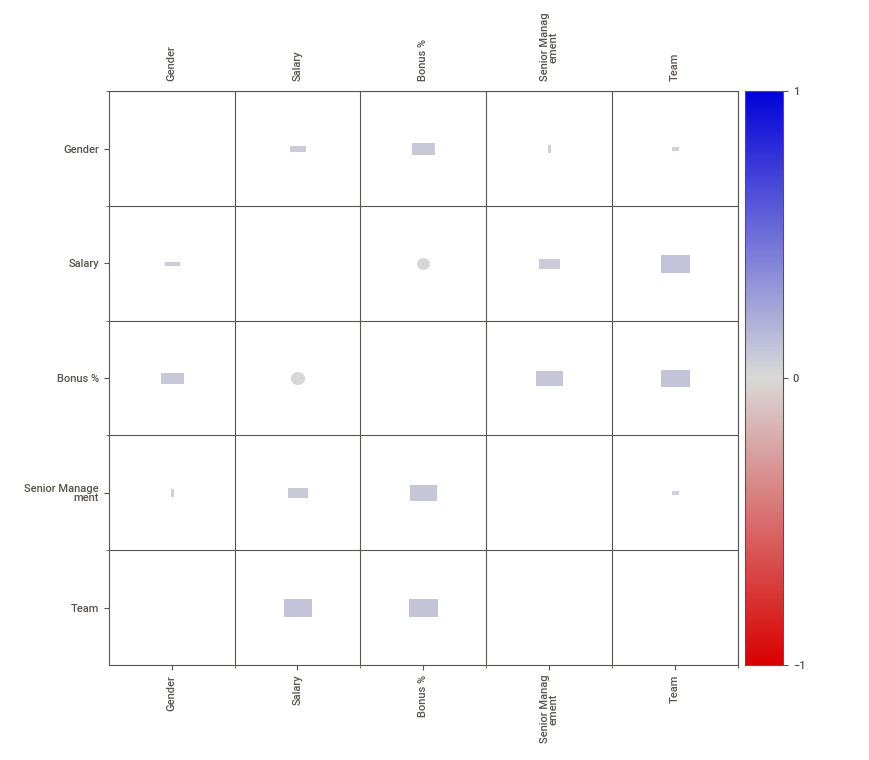
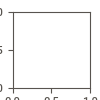

In [18]:
import IPython
IPython.display.HTML('analyze.html')

**Segun la informacíon de las gracias anteriores podemos concluir que:**

*Los generos se dividen en aproximadamente los siguientes porcentajes: El genero femenino un 45%, el genero masculino un 42% y los empleados que no tienen un genero registrado en la base de datos un 14%.


*Los salarios de los empleados estan distribuidos en un rago entre los 150k siendo este el mas alto y los 35k para el salario mas bajo, donde el promedio de los salarios de los empleados esta en los 90k.


*Los bonos que reciben los empleados estan en un rango entre el 1% y el 19% donde el mas alto es el bono que mas reciben los empleados.

